In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')
sys.path.append('../..')

In [4]:
import datatools
import config

In [5]:
from glob import glob

In [30]:
datasets = []
datasets.append({
'id': '0', 'card': 'atlas_nsw_pad_z0','lstyle': 'o-',
})
datasets.append({
'id': '1', 'card': 'atlas_nsw_pad_z0_stg2BC','lstyle': 'o--',
})
#datasets.append({
#'id': '2', 'card': '','lstyle': 'o:',
#})
N_FILES=4
for dataset in datasets:
    dataset['files_W'] = glob(f"{config.SIM}/{dataset['card']}_bkgr_{config.BKGR}/VALIDATE/W*.h5")
    dataset['files_N'] = glob(f"{config.SIM}/{dataset['card']}_bkgr_{config.BKGR}/VALIDATE/N*.h5")
    print(f"dataset {dataset['card']} has {len(dataset['files_W'])} files WithMuon and {len(dataset['files_N'])} noMuon ")

dataset atlas_nsw_pad_z0 has 70 files WithMuon and 78 noMuon 
dataset atlas_nsw_pad_z0_stg2BC has 10 files WithMuon and 16 noMuon 


In [37]:
for dataset in datasets:
    print(f"reding files for {dataset['card']}")
    min_data=min(len(dataset['files_W']),len(dataset['files_N']))
    if min_data < N_FILES: 
        print("need more files")
        exit(1)
    files = [None]*(N_FILES*2)
    files[::2] = dataset['files_W'][:N_FILES]
    files[1::2] = dataset['files_N'][:N_FILES]
    data, dmat, Y, Y_mu, Y_hit, sig_keys = datatools.make_data_matrix(files, max_files=N_FILES*2, sort_by='z')
    dataset['data'] = data
    dataset['dmat'] = dmat
    dataset['Y'] = Y
    dataset['Y_mu'] = Y_mu
    dataset['Y_hit'] = Y_hit
    dataset['sig_keys'] = sig_keys

 28%|██▊       | 5575/20000 [00:00<00:00, 55747.93it/s]

reding files for atlas_nsw_pad_z0
~~ Reading data... ~~
~~ Calculating occupancy information... ~~


 28%|██▊       | 5608/20000 [00:00<00:00, 56077.11it/s]

!!
I read 20000 events, of which 10000 have muon and 10000 do not
!!
reding files for atlas_nsw_pad_z0_stg2BC
~~ Reading data... ~~
~~ Calculating occupancy information... ~~


100%|██████████| 20000/20000 [00:00<00:00, 55822.49it/s]

!!
I read 20000 events, of which 10000 have muon and 10000 do not
!!


In [38]:
for dataset in datasets:
    print(f"dataset: {dataset['card']} has {(dataset['Y_mu']).sum()} Muon and {(1-dataset['Y_mu']).sum()} noMuon")

dataset: atlas_nsw_pad_z0 has 10000 Muon and 10000 noMuon
dataset: atlas_nsw_pad_z0_stg2BC has 10000 Muon and 10000 noMuon


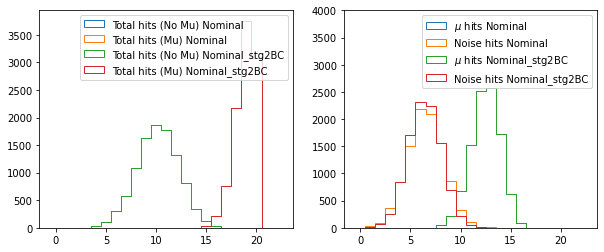

In [43]:
ncols, nrows = (2,1)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()
for dataset in datasets:
    card = dataset['card'].replace(datasets[0]['card'],'Nominal')
    axs[0].hist(data['ev_n_signals'][Y_mu==0], histtype='step', bins=23, range=(-0.5,22.5), label='Total hits (No Mu) '+card)
    axs[0].hist(data['ev_n_signals'][dataset['Y_mu']==1], histtype='step', bins=23, range=(-0.5,22.5), label='Total hits (Mu) '+card)
    axs[1].hist(data['ev_n_mu_signals'][dataset['Y_mu']==1], histtype='step', bins=23, range=(-0.5,22.5), label=r'$\mu$ hits '+card)
    axs[1].hist(data['ev_n_signals'][dataset['Y_mu']==1]-dataset['data']['ev_n_mu_signals'][dataset['Y_mu']==1], histtype='step', bins=23, range=(-0.5,22.5), label='Noise hits '+card)
axs[0].legend()
axs[1].legend()
axs[1].set_ylim([0, 4000])

plt.show()

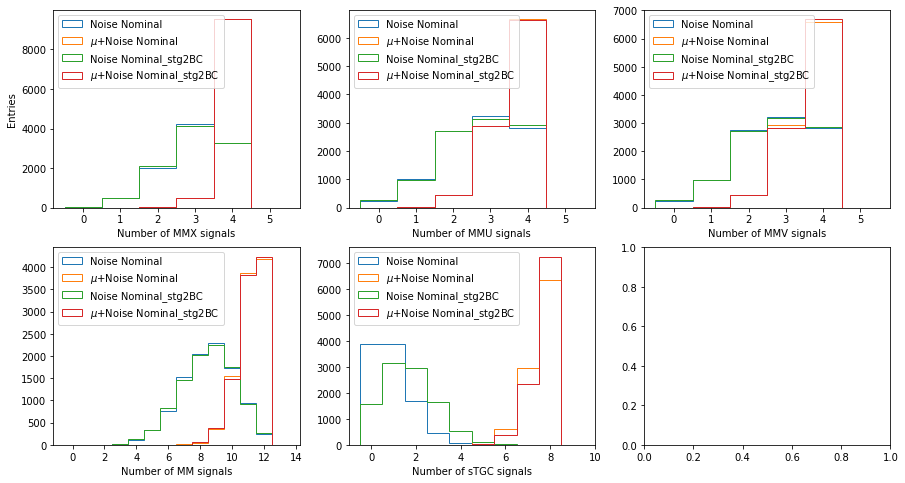

In [44]:
ncols, nrows = (3,2)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()
for dataset in datasets:
    data = dataset['data']
    Y_mu = dataset['Y_mu']
    card = dataset['card'].replace(datasets[0]['card'],'Nominal')
    axs[0].hist(data['n_sig_mmx'][Y_mu==0], histtype='step', range=(-0.5,5.5), bins=6, label='Noise '+card)
    axs[0].hist(data['n_sig_mmx'][Y_mu==1], histtype='step', range=(-0.5,5.5), bins=6, label=r'$\mu$+Noise '+card)
    axs[0].legend(loc='upper left')
    axs[0].set_xlabel('Number of MMX signals')
    axs[0].set_ylabel('Entries')

    axs[1].hist(data['n_sig_mmu'][Y_mu==0], histtype='step', range=(-0.5,5.5), bins=6, label='Noise '+card)
    axs[1].hist(data['n_sig_mmu'][Y_mu==1], histtype='step', range=(-0.5,5.5), bins=6, label=r'$\mu$+Noise '+card)
    axs[1].legend(loc='upper left')
    axs[1].set_xlabel('Number of MMU signals')

    axs[2].hist(data['n_sig_mmv'][Y_mu==0], histtype='step', range=(-0.5,5.5), bins=6, label='Noise '+card)
    axs[2].hist(data['n_sig_mmv'][Y_mu==1], histtype='step', range=(-0.5,5.5), bins=6, label=r'$\mu$+Noise '+card)
    axs[2].legend(loc='upper left')
    axs[2].set_xlabel('Number of MMV signals')

    axs[3].hist(data['n_sig_mm'][Y_mu==0], histtype='step', range=(-0.5,13.5), bins=14, label='Noise '+card)
    axs[3].hist(data['n_sig_mm'][Y_mu==1], histtype='step', range=(-0.5,13.5), bins=14, label=r'$\mu$+Noise '+card)
    axs[3].legend(loc='upper left')
    axs[3].set_xlabel('Number of MM signals')

    axs[4].hist(data['n_sig_stgc'][Y_mu==0], histtype='step', range=(-0.5,9.5), bins=10, label='Noise '+card)
    axs[4].hist(data['n_sig_stgc'][Y_mu==1], histtype='step', range=(-0.5,9.5), bins=10, label=r'$\mu$+Noise '+card)
    axs[4].legend(loc='upper left')
    axs[4].set_xlabel('Number of sTGC signals')
# axs[4].set_yscale('log')

plt.show()

In [11]:
dmat.shape[2]

18

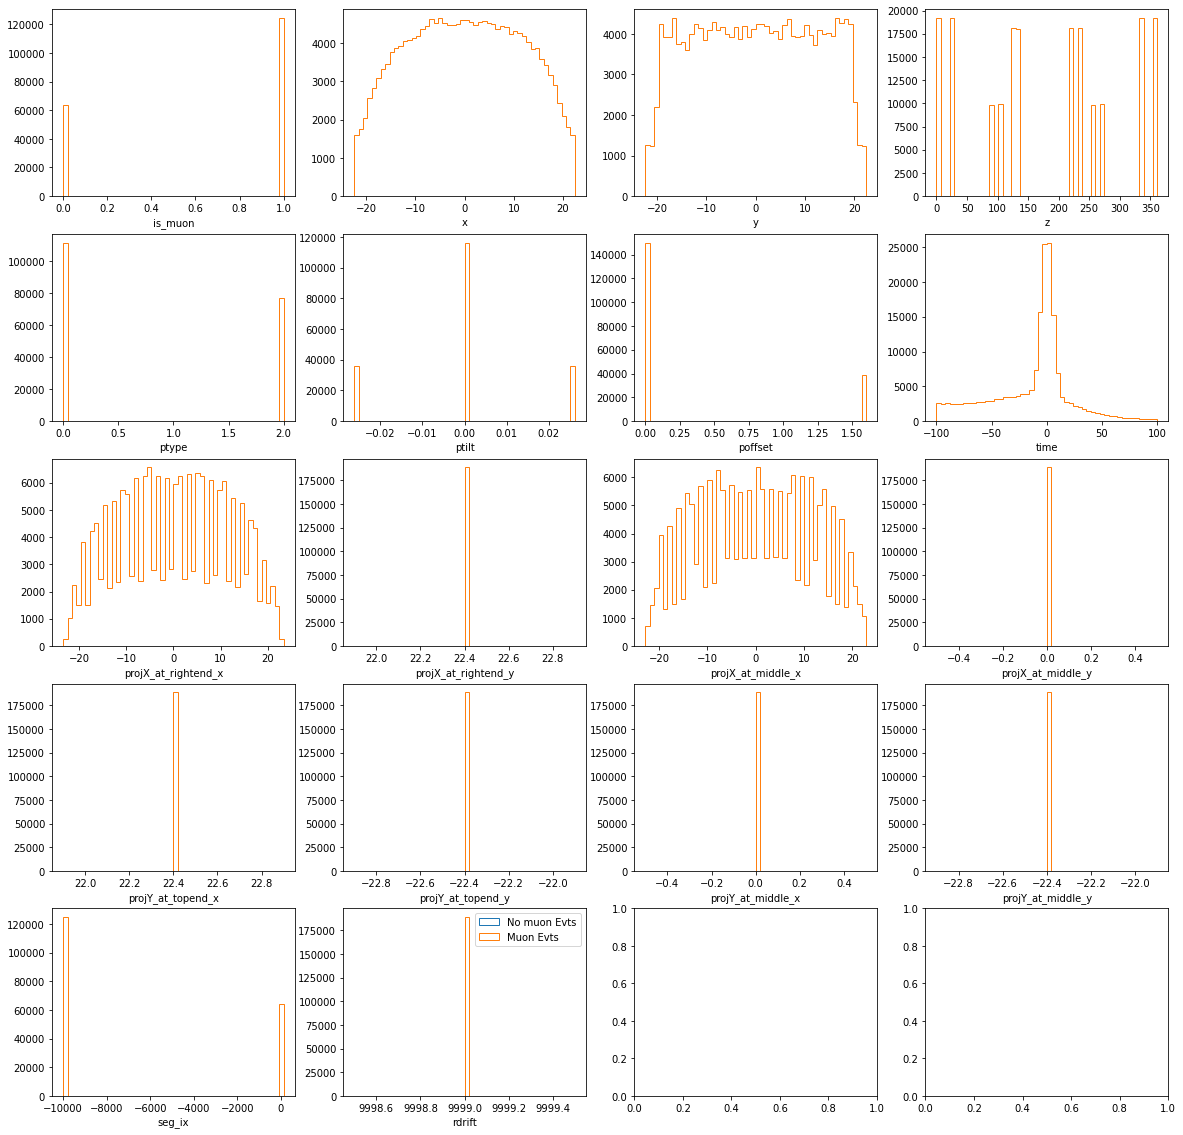

In [12]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(dmat.shape[2]):

    valid_hits_mu   = dmat[Y_mu == 1,:,sig_keys.index('is_muon')].flatten() > -90
    valid_hits_nomu = dmat[Y_mu == 0,:,sig_keys.index('is_muon')].flatten() > -90

    this_var_mu   = dmat[Y_mu == 1,:,ivar].flatten()[valid_hits_mu]
    this_var_nomu = dmat[Y_mu == 0,:,ivar].flatten()[valid_hits_nomu]
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == dmat.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [13]:
X_prep = datatools.training_prep(dmat, sig_keys)

 10%|█         | 1002/10000 [00:00<00:00, 10016.38it/s]

~~ Preparing padded matrix ~~


100%|██████████| 10000/10000 [00:00<00:00, 10048.46it/s]

Output data matrix shape: (10000, 20, 20)


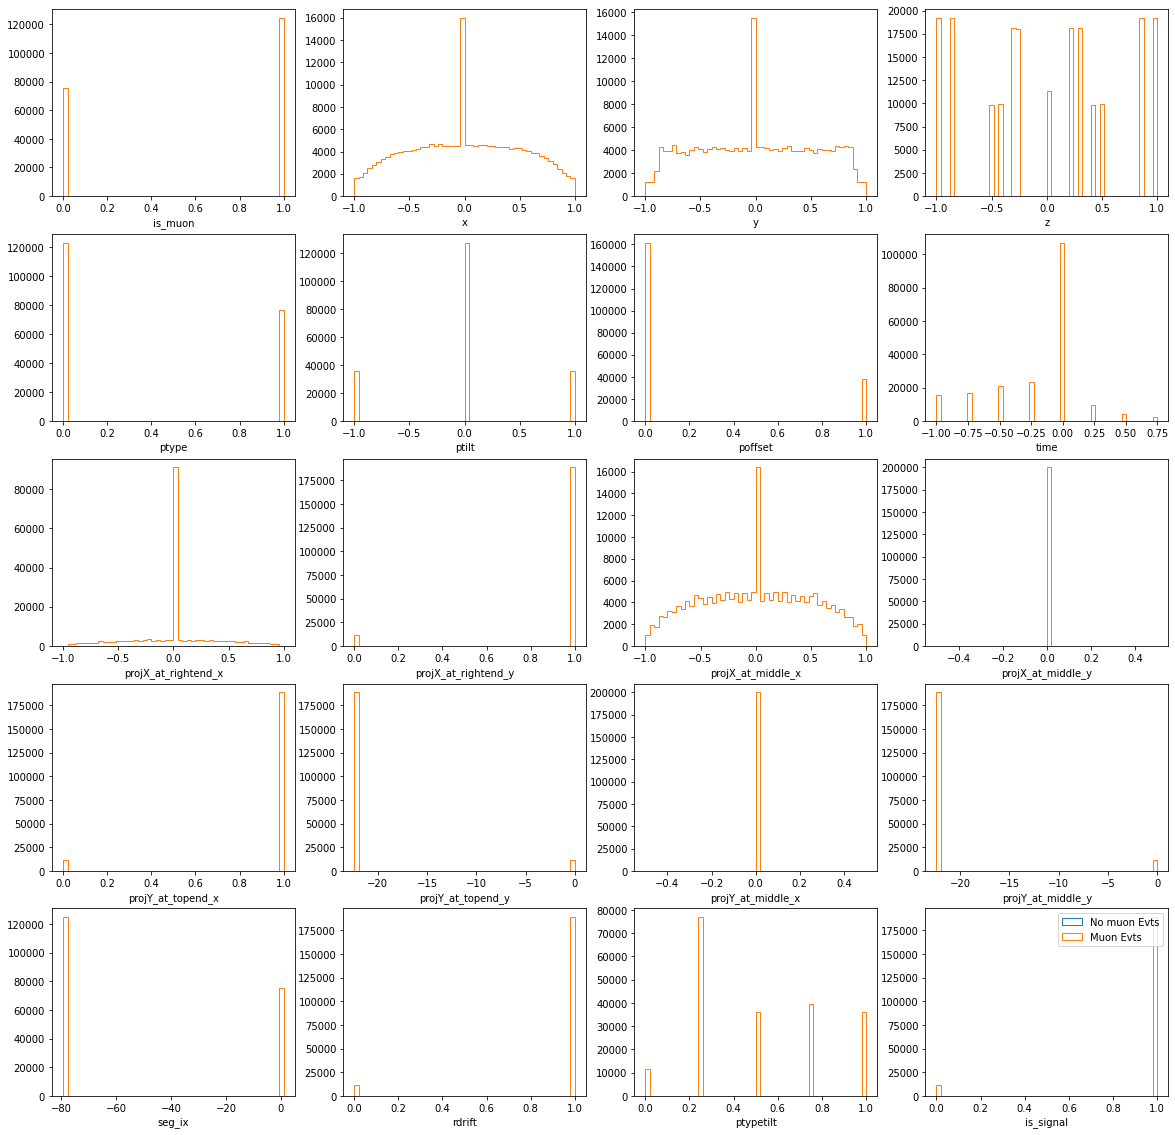

In [14]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(X_prep.shape[2]):

    this_var_mu   = X_prep[Y_mu == 1,:,ivar].flatten()
    this_var_nomu = X_prep[Y_mu == 0,:,ivar].flatten()
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == X_prep.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [15]:
import trainingvariables

In [16]:
vars_of_interest = np.zeros(X_prep.shape[2], dtype=bool)
training_vars = trainingvariables.tvars
for tv in training_vars:
    vars_of_interest[sig_keys.index(tv)] = 1
X = X_prep[:,:,vars_of_interest]
X_keys = np.array(sig_keys)[vars_of_interest]

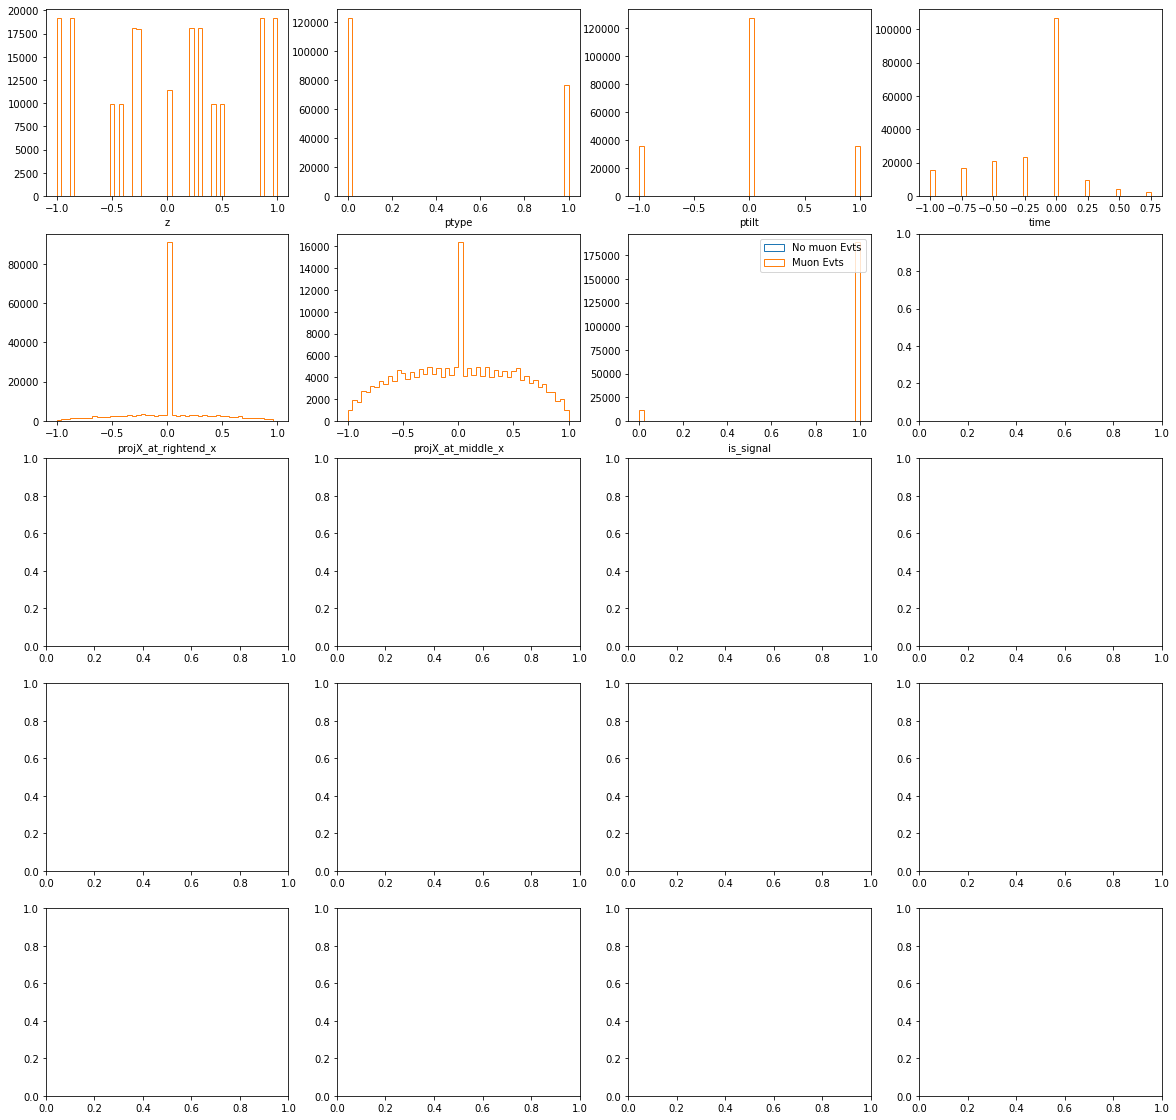

In [17]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(X.shape[2]):

    this_var_mu   = X[Y_mu == 1,:,ivar].flatten()
    this_var_nomu = X[Y_mu == 0,:,ivar].flatten()
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(X_keys[ivar])
    
    if ivar == X.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [18]:
%ls $SIM_LOC

Chi2Fit.ipynb
Detector-Matrix.ipynb
Evaluate-Performance-Class.ipynb
Evaluate-Performance-Reg.ipynb
Evaluate-Performance-Reg-stgc.ipynb
exported_weights.npy
export.ipynb
Input-Plots.ipynb
model.png
Plot-Model-Scans.ipynb
plots/
pruning.ipynb
qkeras.ipynb
SCAN-Evaluate-Performance-Reg-stgc-Copy1.ipynb
SCAN-Evaluate-Performance-Reg-stgc.ipynb


In [19]:
import datatools
X_det = datatools.detector_matrix(dmat, sig_keys, config.DET, True)

AttributeError: module 'datatools' has no attribute 'detector_matrix'

In [ ]:
import datatools
X_det = datatools.detector_matrix_2(dmat, sig_keys, config.DET, True)

In [ ]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(X_det.shape[2]):

    this_var_mu   = X_det[Y_mu == 1,:,ivar].flatten()
    this_var_nomu = X_det[Y_mu == 0,:,ivar].flatten()
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=100, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=100, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == X_det.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [ ]:
vars_of_interest = np.zeros(X_prep.shape[2], dtype=bool)
training_vars = trainingvariables.tvars
for tv in training_vars:
    vars_of_interest[sig_keys.index(tv)] = 1
X = X_prep[:,:,vars_of_interest]
X_keys = np.array(sig_keys)[vars_of_interest]

In [ ]:
ncols=4
nrows=5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,4*nrows))
axs = axs.flatten()

for ivar in range(X.shape[2]):

    this_var_mu   = X[Y_mu == 1,:,ivar].flatten()
    this_var_nomu = X[Y_mu == 0,:,ivar].flatten()
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(X_keys[ivar])
    
    if ivar == X.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()